In [9]:
%config InlineBackend.figure_format = 'retina'  # Prevent fuzziness for retina/3K screens, comment out on other screen types.

from lblcrn.bulk_crn import *
from lblcrn.spec.crn import *
from lblcrn.experiments.xps_io import *
from lblcrn.experiments.solution_system import *
from lblcrn.sim.surface_crn import Results
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.signal as signal
from mpl_toolkits.axes_grid1 import ImageGrid

In [10]:
sm = SpeciesManager()

h2o_ads = sm.sp("H2O*", Orbital('1s', 532.2), color="orange")
h2o_multi = sm.sp("H2O_multi", Orbital('1s', 533.2), size=1, color="pink")
h2o_o_hb = sm.sp("H2O_O_hb", Orbital('1s', 531.6), color="teal")
h2o_oh_hb = sm.sp("H2O_OH_hb", Orbital('1s', 531.6), color="navy")
sm.name_be("H2O_hb", 531.6, color="blue")
o_ads = sm.sp("O*", Orbital('1s', 530.0), color="red")
oh_ads = sm.sp("OH*", Orbital('1s', 530.9), color="magenta")

o2_g = sm.sp("O2_gas", Orbital('1s', 535.0), color=(137, 93, 109))
h2o_g = sm.sp("H2O_gas", Orbital('1s', 0), color="#008ECC")

def rsys_generator(scaled):
    rsys = RxnSystem(
        Rxn(o_ads + h2o_g, h2o_o_hb, scaled[0]), # 0
        
        Rxn(oh_ads + h2o_g, h2o_oh_hb, scaled[1]), # 1
        
        Rxn(h2o_o_hb, oh_ads + oh_ads, scaled[2]), # 2
        
        Rxn(oh_ads + oh_ads, h2o_o_hb, scaled[3]), # 3
        
        Rxn(h2o_oh_hb, h2o_ads + oh_ads, scaled[4]), # 4
        
        Rxn(h2o_o_hb, h2o_ads + o_ads, scaled[5]), # 5
        
        Rxn(h2o_ads, h2o_g, scaled[6]), # 6
        
        Rxn(h2o_g, h2o_ads, scaled[7]), # 7
        
        Rxn(h2o_oh_hb, h2o_g + oh_ads, scaled[8]), # 8
        
        Rxn(h2o_o_hb, o_ads + h2o_g, scaled[9]), # 9
        
        Rxn(h2o_oh_hb + h2o_g, h2o_multi, scaled[10]), # 10
        
        Rxn(h2o_multi, h2o_oh_hb + h2o_g, scaled[11]), # 11
        
        Rxn(o_ads + o_ads, o2_g, scaled[12]), # 12
        
        Rxn(o2_g, o_ads + o_ads, scaled[13]), # 13
        
        Conc(h2o_g, 1.0),
        Conc(o_ads, 0.25),
        sm
    )
    return rsys

In [11]:
constants=[1.238045, 0.526204, 6.220646, 0.160755, 0.299507, 0.167130, 0.794455, 
           0.199022, 0.300480, 0.127713, 0.400796, 0.394500, 0.000960, 76.964514]

In [12]:
rsys = rsys_generator(constants)
s, ts = simulate.simulate_xps_with_cts(rsys, time=20, title="H2O on Ag")

[-0.794455*H2O* + 0.299507*H2O_OH_hb + 0.16713*H2O_O_hb + 0.199022*H2O_gas, -0.400796*H2O_OH_hb*H2O_gas - 0.599987*H2O_OH_hb + 0.526204*H2O_gas*OH* + 0.3945*H2O_multi, -6.515489*H2O_O_hb + 1.238045*H2O_gas*O* + 0.160755*OH***2, 0.794455*H2O* - 0.400796*H2O_OH_hb*H2O_gas + 0.30048*H2O_OH_hb + 0.127713*H2O_O_hb - 1.238045*H2O_gas*O* - 0.526204*H2O_gas*OH* - 0.199022*H2O_gas + 0.3945*H2O_multi, 0.400796*H2O_OH_hb*H2O_gas - 0.3945*H2O_multi, 0.294843*H2O_O_hb - 1.238045*H2O_gas*O* - 0.00192*O***2 + 153.929028*O2_gas, 0.00096*O***2 - 76.964514*O2_gas, 0.599987*H2O_OH_hb + 12.441292*H2O_O_hb - 0.526204*H2O_gas*OH* - 0.32151*OH***2]


In [13]:
r = Results(None, rsys, df=ts.df.rename(columns=lambda c: str(c)))

Text(0.5, 1.0, 'Bulk CRN Trajectory till Equilibrium')

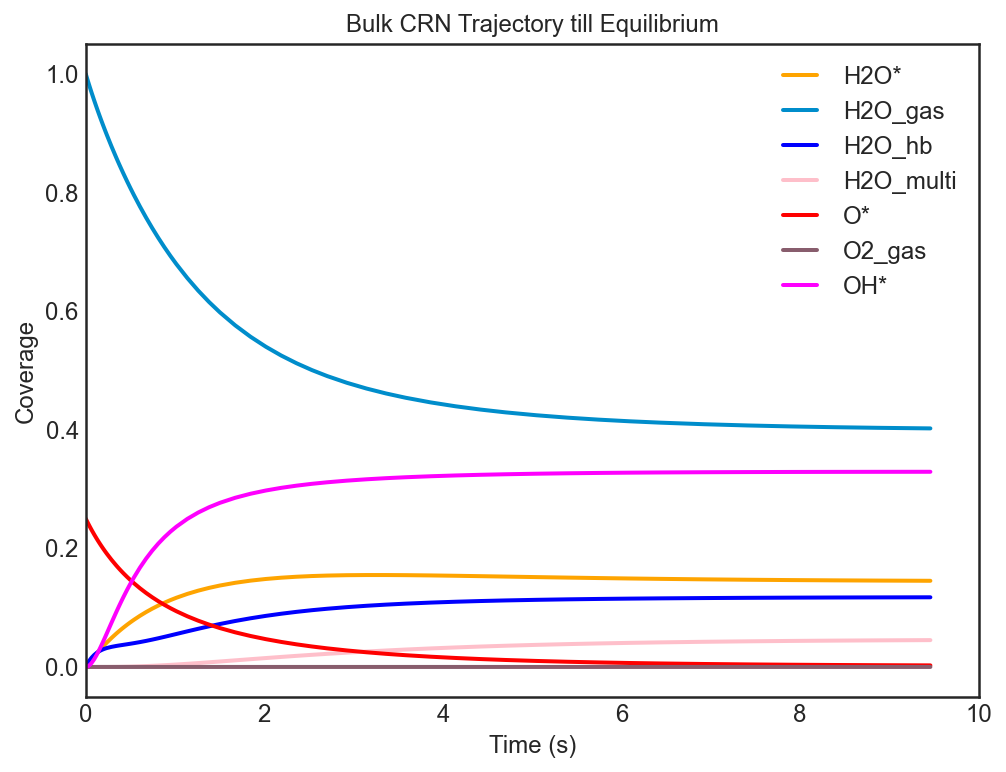

In [14]:
r.plot_evolution(end_time=10, use_raw_data=True)
ax = plt.gca()
ax.set_ylabel("Coverage")
ax.set_title("Bulk CRN Trajectory till Equilibrium")